<a href="https://colab.research.google.com/github/ROHANCSE14/CREDIT-SCORE-MODEL/blob/main/REVENUE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REVENUE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/revenue_prediction.csv")
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


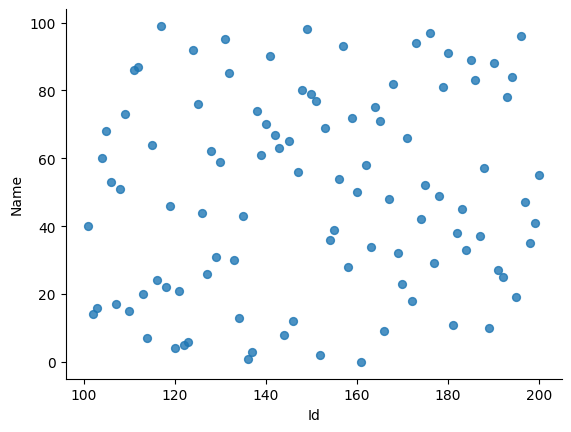

In [21]:
# @title Id vs Name

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Id', y='Name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

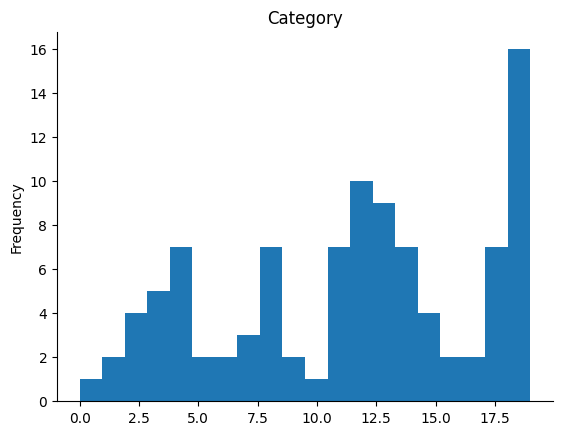

In [20]:
# @title Category

from matplotlib import pyplot as plt
df['Category'].plot(kind='hist', bins=20, title='Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

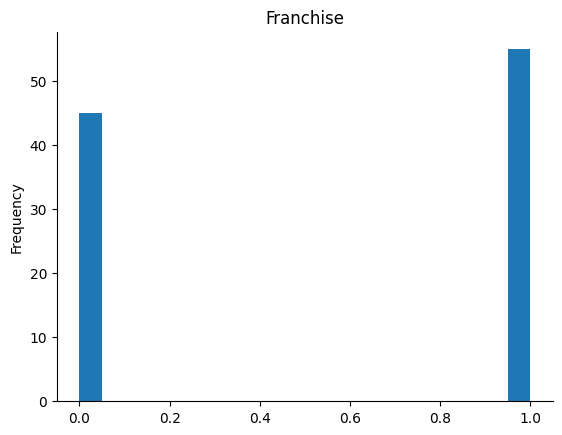

In [19]:
# @title Franchise

from matplotlib import pyplot as plt
df['Franchise'].plot(kind='hist', bins=20, title='Franchise')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [4]:
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


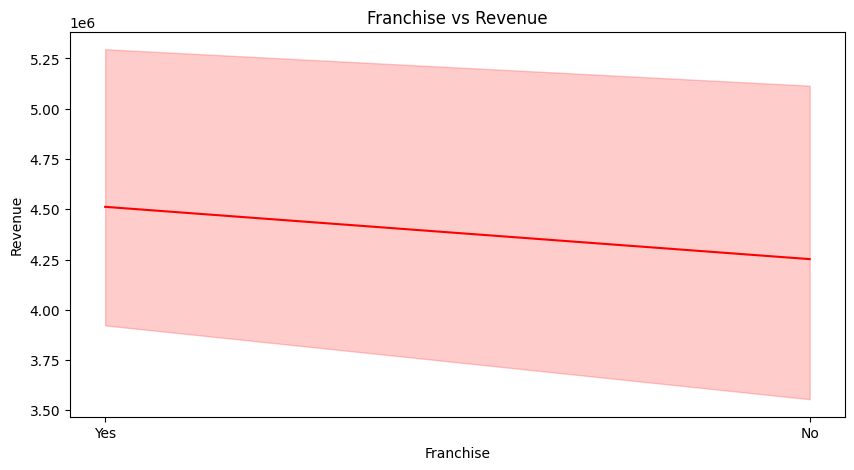

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Franchise'],y=df['Revenue'],color='red')
plt.title("Franchise vs Revenue")
plt.xlabel("Franchise")
plt.ylabel("Revenue")
plt.show()

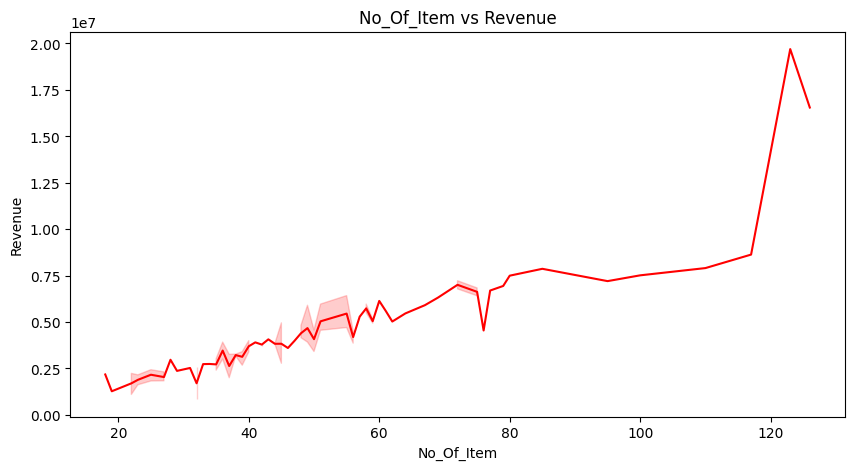

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['No_Of_Item'],y=df['Revenue'],color='red')
plt.title("No_Of_Item vs Revenue")
plt.xlabel("No_Of_Item")
plt.ylabel("Revenue")
plt.show()

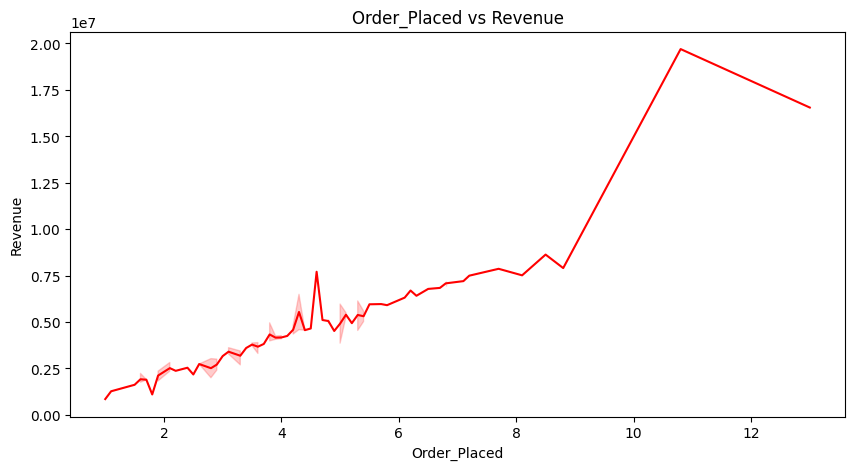

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Order_Placed'],y=df['Revenue'],color='red')
plt.title("Order_Placed vs Revenue")
plt.xlabel("Order_Placed")
plt.ylabel("Revenue")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])
df['Category']=le.fit_transform(df['Category'])
df['Name']=le.fit_transform(df['Name'])
df['Franchise']=le.fit_transform(df['Franchise'])
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,40,1,12,0,55,5.5,5953753
1,102,14,0,19,1,72,6.8,7223131
2,103,16,1,5,4,25,1.9,2555379
3,104,60,1,11,2,18,2.5,2175511
4,105,68,1,13,3,48,4.2,4816715


In [14]:
X=df.drop(['Revenue'],axis=1)
y=df['Revenue']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
difference=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
difference


,Actual Value,Predicted Value
83,5966193,6.610485e+06
53,5595267,5.613271e+06
70,3982767,3.817105e+06
45,3752885,4.146923e+06
44,4264176,4.365714e+06
39,3818055,3.810566e+06
22,4956086,3.938440e+06
80,3727364,3.467277e+06
10,3945135,4.089274e+06
0,5953753,6.576391e+06


from matplotlib import pyplot as plt
difference['Actual Value'].plot(kind='hist', bins=20, title='Actual Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
difference['Predicted Value'].plot(kind='hist', bins=20, title='Predicted Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
difference.plot(kind='scatter', x='Actual Value', y='Predicted Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
difference['Actual Value'].plot(kind='line', figsize=(8, 4), title='Actual Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
difference['Predicted Value'].plot(kind='line', figsize=(8, 4), title='Predicted Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8621903965008729

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


<ipython-input-16-1300137937>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual Value')
<ipython-input-16-1300137937>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted Value')


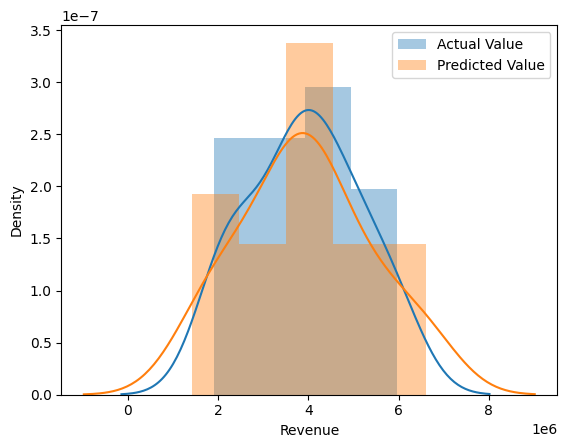

In [16]:
sns.distplot(y_test,label='Actual Value')
sns.distplot(y_pred,label='Predicted Value')
plt.legend()

0.8255169633077819
255487948213.95
360964.25
0.11123013173533489
505458.1567389629


<ipython-input-17-3467245609>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual Value')
<ipython-input-17-3467245609>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted Value')


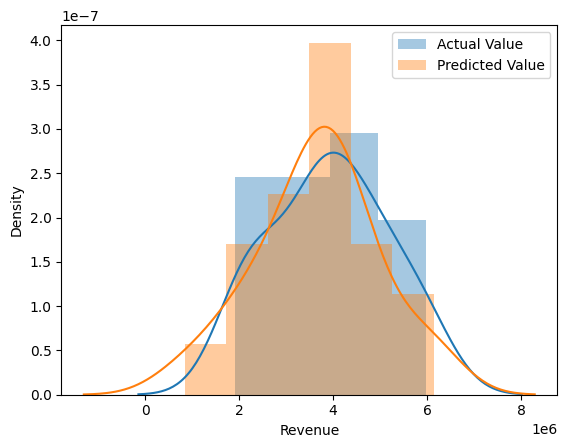

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test,y_pred))
sns.distplot(y_test,label='Actual Value')
sns.distplot(y_pred,label='Predicted Value')
plt.legend()

0.838099010921106
237064601222.75372
376398.45149999997
0.10044438602181285
486892.80259904615


<ipython-input-18-1186234408>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual Value')
<ipython-input-18-1186234408>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted Value')


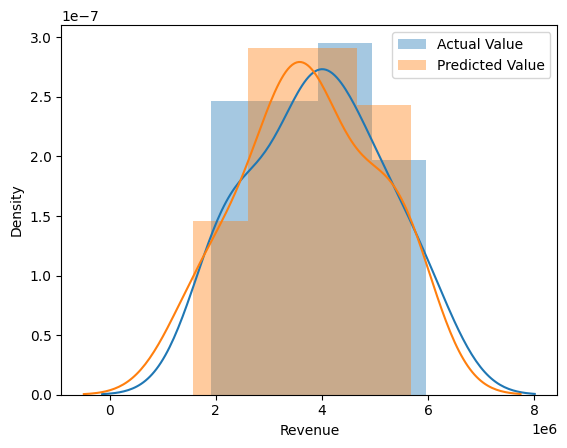

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test,y_pred))
sns.distplot(y_test,label='Actual Value')
sns.distplot(y_pred,label='Predicted Value')
plt.legend()